In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#no of duplicates in the dataset

In [8]:
no_of_duplicates = df.duplicated().sum(axis=0)
no_of_duplicates

21

In [9]:
df = df.drop_duplicates()
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [10]:
df.duplicated().sum(axis=0)

0

In [11]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df['Title'].isnull().sum()

3789

code to remove rows with review heading as null

In [13]:
#df.dropna(subset=['Review Text'], inplace= True)

# EDA

### counting the no of values in recommendations (1- recomennded, 0 - not recommended )

In [14]:
df['Recommended IND'].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

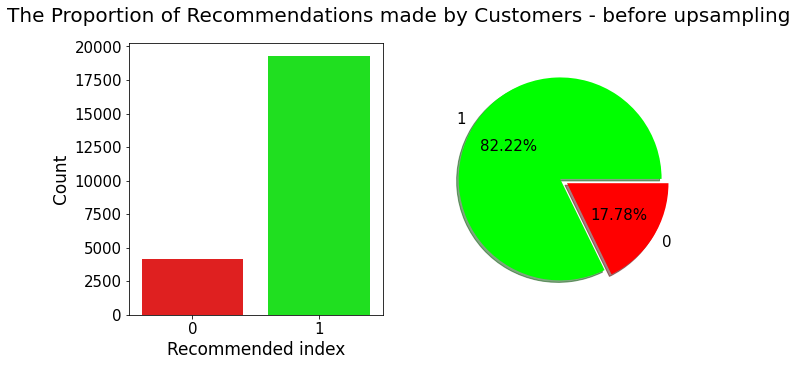

In [15]:

fig = plt.figure(figsize=(10,5))
fig.suptitle("The Proportion of Recommendations made by Customers - before upsampling",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Recommended IND'].unique()
palette = ["#ff0000","#00ff00"]
sns.countplot(x= df['Recommended IND'],data=df,palette=palette)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Recommended index",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.subplot(1, 2, 2)
plt.pie(x= df['Recommended IND'].value_counts(),colors=["#00ff00","#ff0000"], labels = ("1","0"), 
        explode = (0, 0.08), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

since the gap between the no of not recommended polls and recommended polls is really high, we will do some upscaling to make the gap smaller. 

This process prevents the models from inclining towards the majority class

In [16]:
df_majority = df[(df["Recommended IND"]==1)]
df_minority = df[(df['Recommended IND']==0)]


df_minority_upsampled = resample(df_minority,replace=True,n_samples=15539,random_state=42)

df_upsampled = pd.concat([df_minority_upsampled,df_majority])

In [17]:
df['Recommended IND'].value_counts()

1    19293
0     4172
Name: Recommended IND, dtype: int64

In [18]:
df_upsampled['Recommended IND'].value_counts()

1    19293
0    15539
Name: Recommended IND, dtype: int64

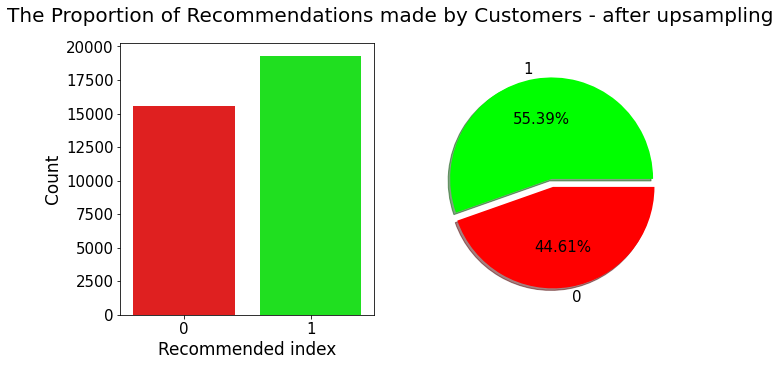

In [19]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("The Proportion of Recommendations made by Customers - after upsampling",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df_upsampled['Recommended IND'].unique()
palette = ["#ff0000","#00ff00"]
sns.countplot(x= df_upsampled['Recommended IND'],data=df_upsampled,palette=palette)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Recommended index",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.subplot(1, 2, 2)
plt.pie(x= df_upsampled['Recommended IND'].value_counts(),colors=["#00ff00","#ff0000"], labels = ("1","0"), 
        explode = (0, 0.08), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

## 0- not recommended; 1- not recommended

### The above graph shows that a large number of the store's products were recommended by the customers

In [20]:
df["Rating"].value_counts()

5    13111
4     5076
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [21]:
df_rating = df
#1star
row_index = df_rating.index[df_rating['Rating']==1]
df_rating.loc[row_index,'star']='1star'

In [22]:
#2star
row_index = df_rating.index[df_rating['Rating']==2]
df_rating.loc[row_index,'star']='2star'

In [23]:
#3star
row_index = df_rating.index[df_rating['Rating']==3]
df_rating.loc[row_index,'star']='3star'

In [24]:
#4star
row_index = df_rating.index[df_rating['Rating']==4]
df_rating.loc[row_index,'star']='4star'

In [25]:
#5star
row_index = df_rating.index[df_rating['Rating']==5]
df_rating.loc[row_index,'star']='5star'

In [26]:
df_rating.head(13)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,star
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,4star
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,5star
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,3star
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,5star
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,5star
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,2star
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,5star
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,4star
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,5star
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,5star


#### making the dataframe for measuring the customer ratings 

In [27]:
df_rating_subset_star= pd.DataFrame(df_rating.groupby('star').count()["Class Name"])


df_rating_subset_star.rename(columns={'Class Name':'Count'},inplace= True)
df_rating_subset_star

,Count
star,
1star,842
2star,1565
3star,2871
4star,5076
5star,13097


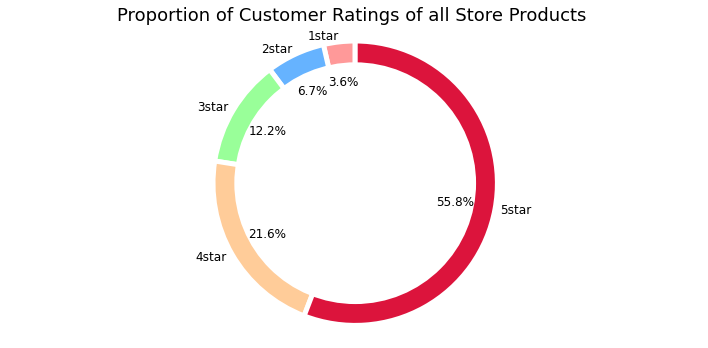

In [28]:
import matplotlib.pyplot as plt
# Pie chart

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#DC143C"]
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.title("Proportion of Customer Ratings of all Store Products ",fontsize= 18)
#draw circle
centre_circle = plt.Circle((0,0),0.850,fc='white')



#sns.set(font_scale = 2)
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 12

ax1.pie(df_rating_subset_star['Count'], colors = colors, labels=df_rating_subset_star.index, autopct='%1.1f%%',
        wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' } ,startangle=90,
        pctdistance=0.715, labeldistance=1.04)

fig = plt.gcf()

fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

##### The above chart confirms that more than 50% of the customer rated the store products very highly, 
##### while less than 12%(customers who rated 1 and 2) were not happy with their purchase

In [29]:
df["Division Name"].value_counts()

General           13839
General Petite     8110
Initmates          1502
Name: Division Name, dtype: int64

["#B0C4DE","#40E0D0","#DAA520","#4169E1","#DC143C"]

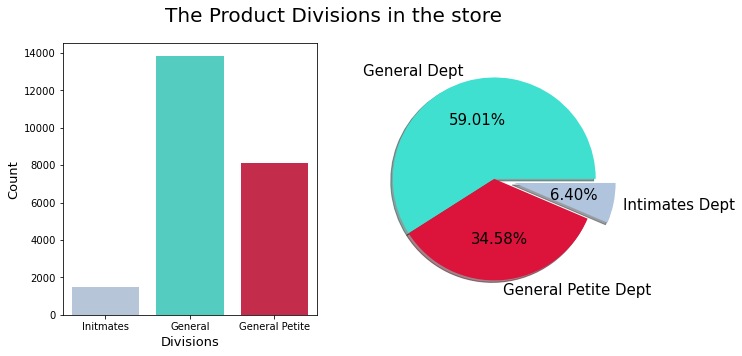

In [30]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("The Product Divisions in the store",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Division Name'].unique()
palette = ["#B0C4DE","#40E0D0","#DC143C"]
sns.countplot(x= df['Division Name'],data=df,palette=palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Divisions",fontsize=13)
plt.ylabel("Count",fontsize=13)

plt.subplot(1, 2, 2)
plt.pie(x= df['Division Name'].value_counts(),colors=['#40E0D0',"#DC143C",'#B0C4DE'], labels = ('General Dept','General Petite Dept',"Intimates Dept"), 
        explode = (0, 0,0.2), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

#### more than 50% of clothes are bought from the General dept while the intimates dept accounts for only about 7% of the total store purchaces.

In [31]:
df["Department Name"].value_counts()

Tops        10455
Dresses      6312
Bottoms      3798
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [32]:
df['Department Name']

0        Intimate
1         Dresses
2         Dresses
3         Bottoms
4            Tops
           ...   
23481     Dresses
23482        Tops
23483     Dresses
23484     Dresses
23485     Dresses
Name: Department Name, Length: 23465, dtype: object

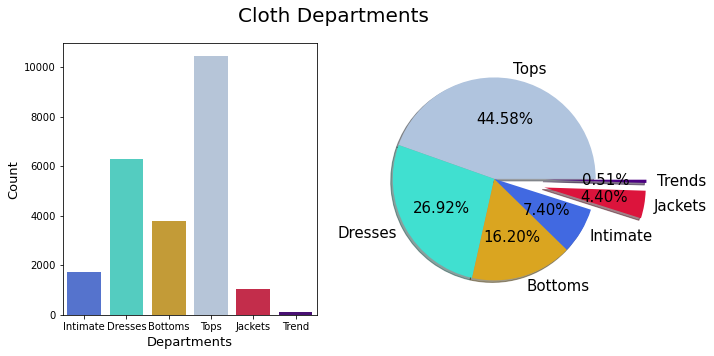

In [33]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Cloth Departments",fontsize=20)
plt.subplot(1, 2, 1)
# Unique category labels: 'Diet', 'MOD-PA'...
color_labels = df['Department Name'].unique()
palette = ["#4169E1","#40E0D0","#DAA520","#B0C4DE","#DC143C",'#4B0082']
sns.countplot(x= df['Department Name'],data=df,palette=palette)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Departments",fontsize=13)
plt.ylabel("Count",fontsize=13)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),colors=["#B0C4DE","#40E0D0","#DAA520","#4169E1","#DC143C",'#4B0082'],
        labels = ('Tops','Dresses',"Bottoms","Intimate","Jackets","Trends"), 
        explode = (0, 0, 0, 0, 0.5, 0.5), shadow = True, autopct = '%1.2f%%',textprops={'fontsize': 15})
plt.xticks(fontsize=15)
plt.show()

#### above graph confirms that the store actively sold clothes from the Tops dept, and not as much in the Trends Dept

In [64]:
df["Age"].value_counts().sort_index()[0:50]

18       4
19      40
20     108
21     102
22     146
23     247
24     245
25     331
26     423
27     344
28     428
29     513
30     406
31     569
32     631
33     725
34     802
35     905
36     839
37     764
38     779
39    1267
40     617
41     741
42     651
43     578
44     617
45     529
46     712
47     564
48     625
49     490
50     398
51     393
52     442
53     560
54     395
55     328
56     471
57     363
58     277
59     321
60     341
61     226
62     338
63     239
64     247
65     226
66     275
67     157
Name: Age, dtype: int64

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


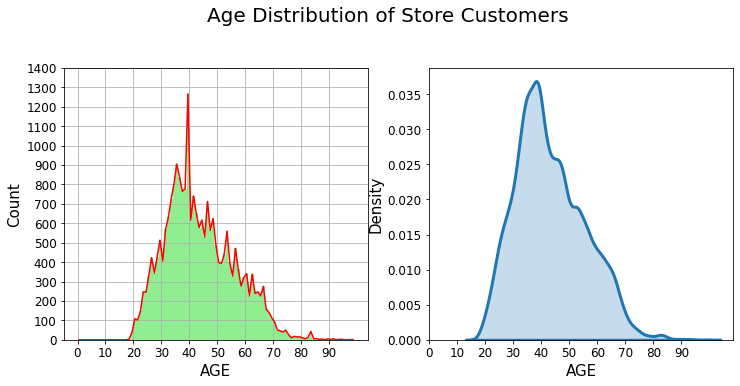

                   Majority of the Customers are between 30 - 50 years of age


In [102]:
plt.figure(figsize=(12,5))
subtitle_string = "Majority of the Customers are between 30 - 50 years of age"
plt.suptitle("Age Distribution of Store Customers",y=1.05,fontsize= 20)

plt.subplot(1,2,1)

width = 1
counts, bins, bars = plt.hist(data=df, x='Age', bins=np.arange(0, 100, width),color='lightgreen')

plt.plot(bins[:-1] + width/2, counts,color='red')
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,1500,100))
plt.grid()
plt.xlabel("AGE",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.subplot(1,2,2)
sns.distplot(df['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("AGE",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.xticks(np.arange(0,100,10))
plt.show()
print("                   "+subtitle_string)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


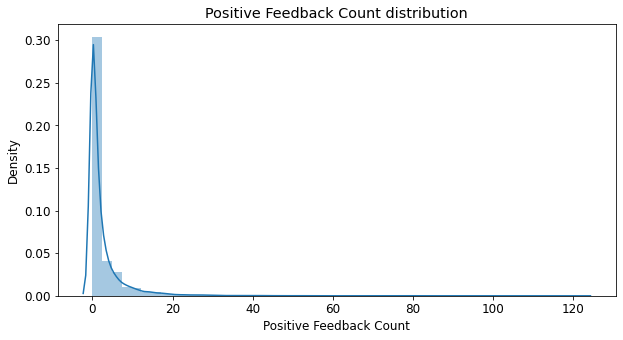

In [108]:
plt.figure(figsize = (10,5))

plt.title = ('Positive Feedback Count')

sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count distribution")
plt.show()

<Figure size 720x1080 with 0 Axes>

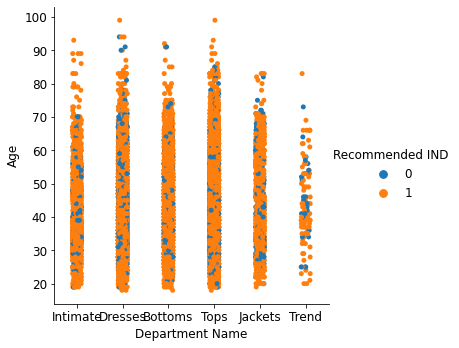

In [119]:
plt.figure(figsize=(15,10))
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= df)
plt.show()

### the majority of the products from all the departments are fast moving/selling

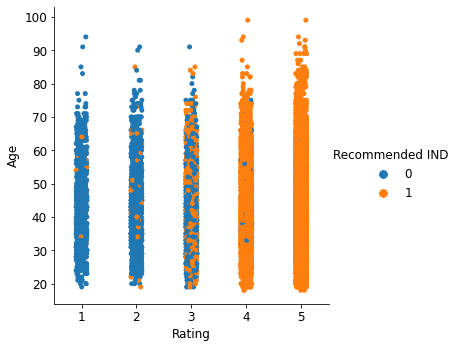

In [110]:
sns.catplot(x="Rating", y="Age", hue="Recommended IND",data= df)

### product with 1-2 rating are clearly not popular with customers, while those with 4-5 rating are selling very well. 